<a href="https://colab.research.google.com/github/LilianeEff/Data201/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Final Project**
Liliane Effoudou

Data 201




Dataset: **Fatal Police Shootings**

The Fatal Police shooting dataset logs all shooting done by the police from the year 2015 till now.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
!pip install graphviz
from sklearn.tree import DecisionTreeRegressor, plot_tree


**Prepare and wrangle your data**

In [2]:
#Prepare and wrangle your data
df=pd.read_csv('https://raw.githubusercontent.com/LilianeEff/Data110/refs/heads/main/Dataset/fatal-police-shootings-data.csv')
df.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473


In [3]:
#clean my data of unnecessary columns
columns_to_drop = ['location_precision', 'race_source', 'id']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.head()

,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,name,age,gender,race,was_mental_illness_related,body_camera,agency_ids
0,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,Tim Elliot,53.0,male,A,True,False,73
1,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,Lewis Lee Lembke,47.0,male,W,False,False,70
2,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,John Paul Quintero,23.0,male,H,False,False,238
3,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,Matthew Hoffman,32.0,male,W,True,False,196
4,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,Michael Rodriguez,39.0,male,H,False,False,473


**Use EDA principles and the Matplotlib / Seaborn packages to visualize the data.**

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497 entries, 0 to 9496
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        9497 non-null   object 
 1   threat_type                 9430 non-null   object 
 2   flee_status                 8199 non-null   object 
 3   armed_with                  9285 non-null   object 
 4   city                        9427 non-null   object 
 5   county                      4775 non-null   object 
 6   state                       9497 non-null   object 
 7   latitude                    8446 non-null   float64
 8   longitude                   8446 non-null   float64
 9   name                        9152 non-null   object 
 10  age                         9110 non-null   float64
 11  gender                      9470 non-null   object 
 12  race                        8372 non-null   object 
 13  was_mental_illness_related  9497 

,latitude,longitude,age
count,8446.000000,8.446000e+03,9110.00000
mean,36.641434,-1.066443e+12,37.42371
std,5.338954,9.800835e+13,12.93761
min,19.497503,-9.007175e+15,2.00000
25%,33.462314,-1.119961e+02,28.00000
50%,36.077343,-9.434420e+01,35.00000
75%,40.033470,-8.318070e+01,45.00000
max,71.301255,-6.786717e+01,92.00000


-What age range sees the most amounts of deaths?

The dataset and the graph show ages 33-37 are the ones most affected.

age
33.0    318
34.0    316
31.0    313
32.0    306
30.0    303
       ... 
8.0       1
92.0      1
2.0       1
85.0      1
4.0       1
Name: count, Length: 83, dtype: int64


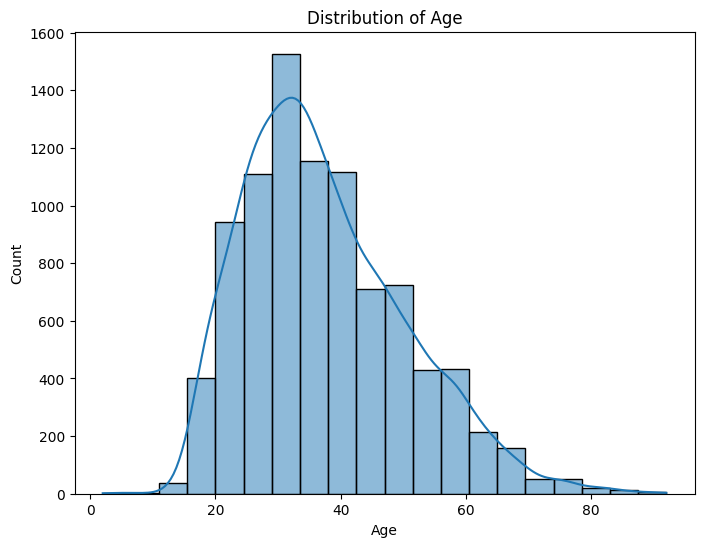

In [5]:
print(df['age'].value_counts())
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

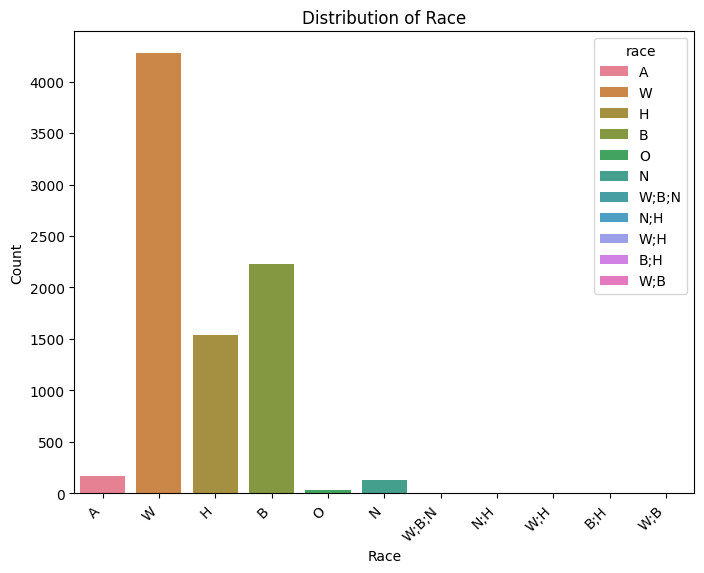

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='race', data=df, hue='race')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


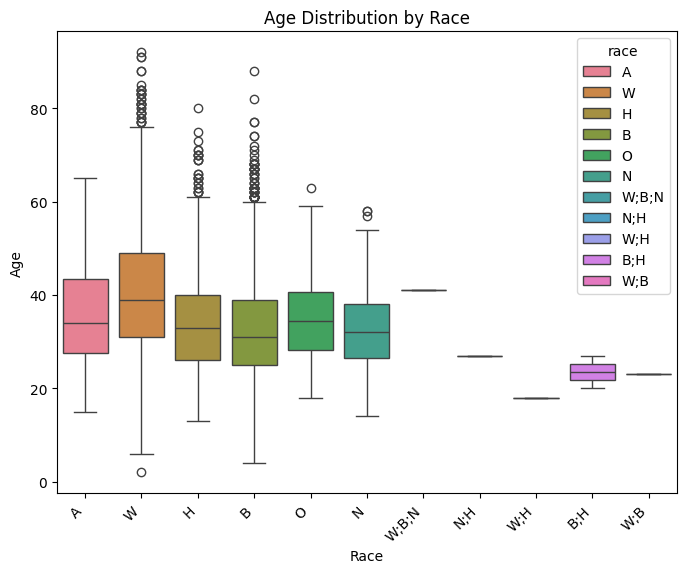

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='race', y='age', data=df, hue='race')
plt.title('Age Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.show()

**Use scikit-learn KMeans to train the data. Use appropriate metric.**

In [8]:

from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)

In [9]:
numerical_features = ['age', 'state']
X = df[numerical_features]

X = X.dropna()

# 2. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. KMeans Clustering
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)  # Train the model

# 4. Get Cluster Labels
cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels

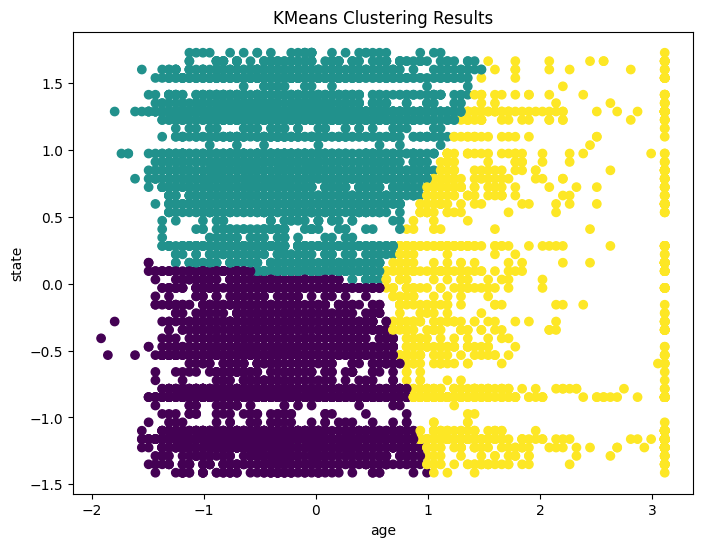

Cluster Means:
                age      state
cluster                      
0        25.401317   8.992472
1        27.555182  38.401913
2        62.157589  19.470588

Distribution of 'date' by Cluster:
cluster  date
0        2030    0.001647
         63      0.001411
         703     0.001411
         1188    0.001411
         2438    0.001411
                   ...   
2        3126    0.000726
         3130    0.000726
         3137    0.000726
         3139    0.000726
         3147    0.000726
Name: proportion, Length: 5799, dtype: float64

Distribution of 'threat_type' by Cluster:
cluster  threat_type
0        6              0.276641
         5              0.273583
         4              0.171254
         1              0.157845
         3              0.054105
         7              0.035521
         2              0.019290
         0              0.006587
         8              0.005175
1        5              0.289997
         6              0.262859
         4              

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.title('KMeans Clustering Results')
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.show()

# Analyzing Cluster Characteristics
# Calculate cluster means for each feature:
cluster_means = df.groupby('cluster')[numerical_features].mean()
print("Cluster Means:\n", cluster_means)

# Analyze the distribution of other features within clusters:
for feature in df.columns:
    if feature not in numerical_features and feature != 'cluster':
        print(f"\nDistribution of '{feature}' by Cluster:")
        print(df.groupby('cluster')[feature].value_counts(normalize=True))

In [34]:
cluster_stats = df.groupby('cluster').agg({'age': ['mean', 'median'], 'state': 'count'})
print(cluster_stats)


              age           state
             mean    median count
cluster                          
0       -0.376008 -0.400320  4251
1       -0.245529 -0.279161  3869
2        1.850663  1.477640  1377


Cluster three has more of a relationship than the previous clusters, meaning that age and state are directly related.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, df['age'], test_size=0.2, random_state=42
)

# regression
reg = DecisionTreeRegressor(max_depth=5, random_state=42)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

# classification
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

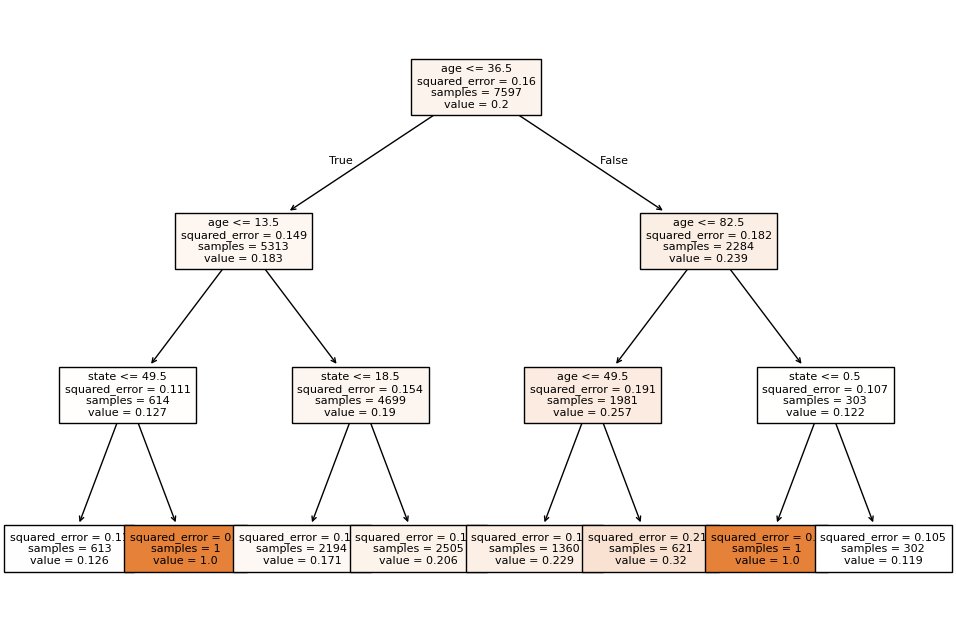

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, df['was_mental_illness_related'], test_size=0.2, random_state=42
)

#Decision tree regression
reg = DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(reg, feature_names=numerical_features, filled=True, fontsize=8)
plt.savefig('decision_tree_regression.png')
plt.show()

Age Is a Strong Predictor:

Younger individuals (≤36.5) involved in fatal police shootings are less likely to have a mental illness compared to older individuals.
The likelihood of mental illness increases for individuals aged 36.5–82.5, making this group particularly significant for understanding mental health in these incidents.
State Has a Geographic Influence:

Repeated splits on state suggest that the likelihood of mental illness varies significantly by region.
For example, individuals in states with state <= 49.5 consistently have slightly lower mental illness likelihoods.
High Likelihood in Certain Groups:

Older adults (36.5–82.5 years old) in specific regions have a high likelihood of mental illness in fatal police shootings (value = 0.257).
Conversely, young children (≤13.5 years old) have a very low likelihood of mental illness (value = 0.127).
Geographic and Demographic Trends:





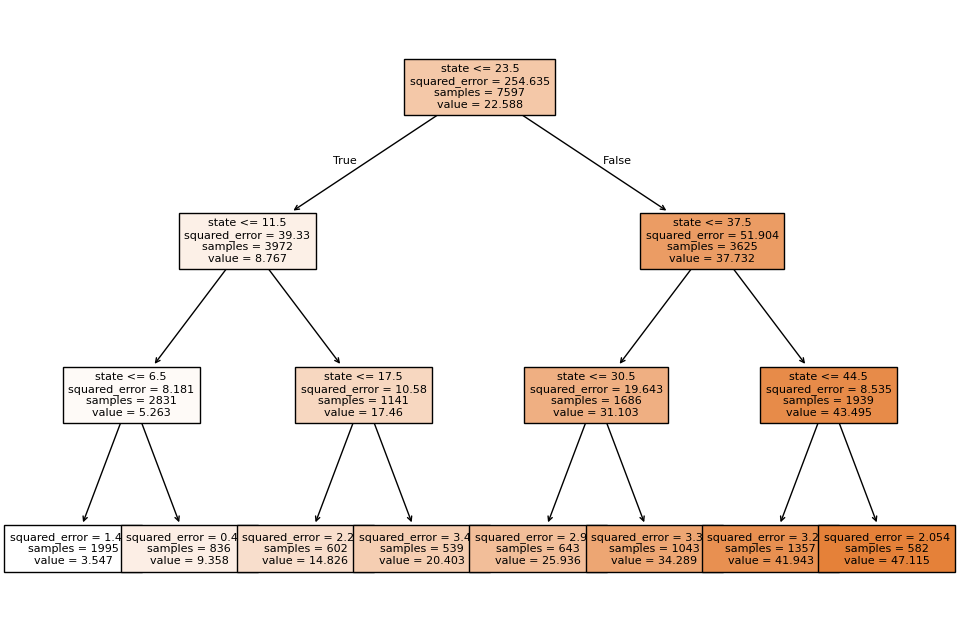

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, df['state'], test_size=0.2, random_state=42
)

# regression
reg = DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(X_train, y_train)

# decision tree
plt.figure(figsize=(12, 8))
plot_tree(reg, feature_names=numerical_features, filled=True, fontsize=8)
plt.savefig('decision_tree_regression.png')
plt.show()

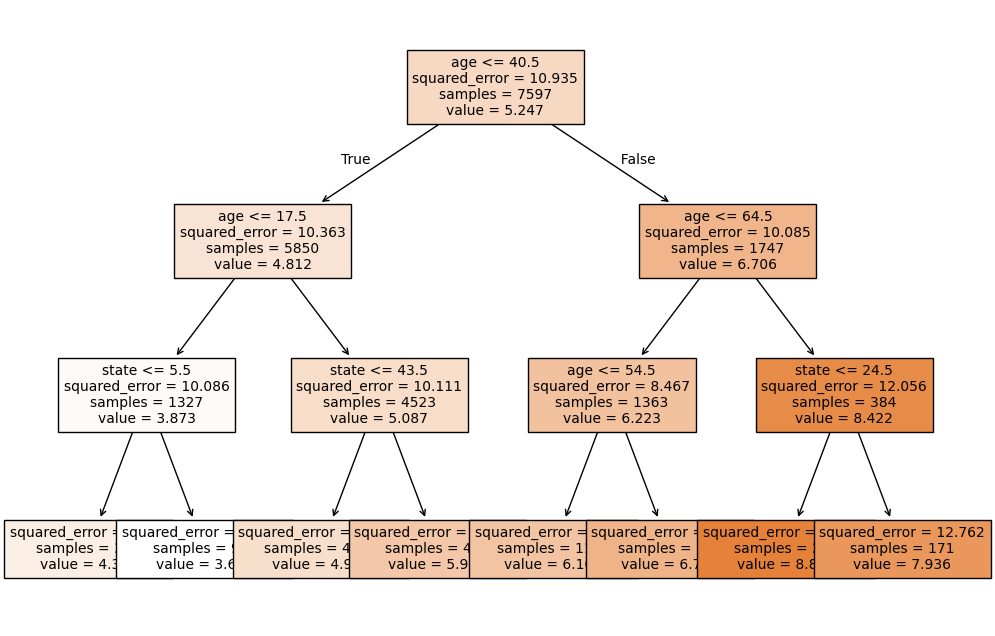

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, df['race'], test_size=0.2, random_state=42
)

# Example for regression
reg = DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(reg, feature_names=numerical_features, filled=True, fontsize=10)
plt.savefig('decision_tree_regression.png')
plt.show()

Age is still a Dominant Factor: The initial split on age indicates that it's a strong predictor of race in this tree. Younger individuals seem to be more affected even in racial terms.

State Provides Geographic Context: The splits on state suggest that geographical location influences the prediction of race. Different states have more racial diversity than others.


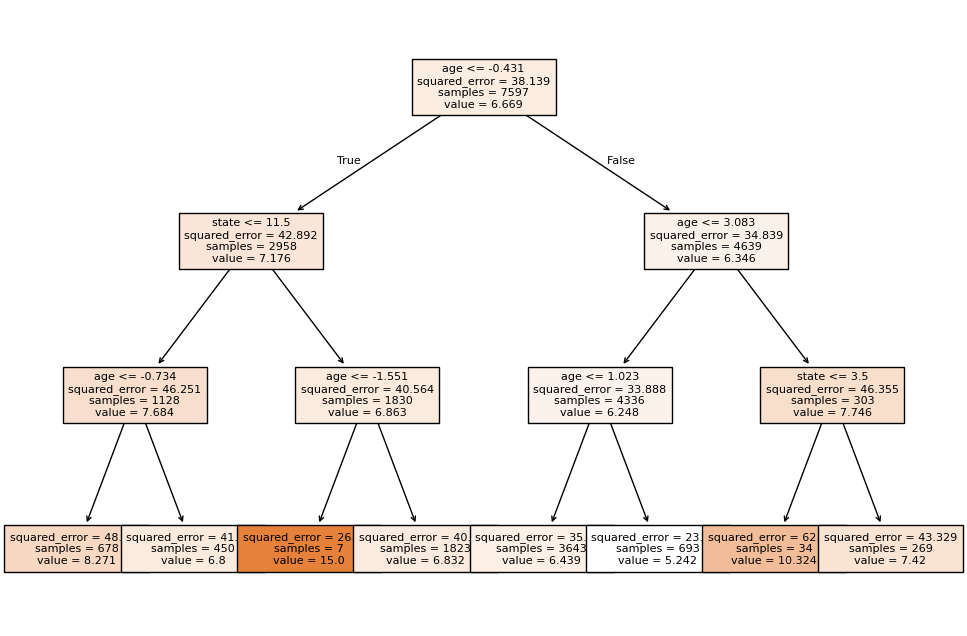

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, df['armed_with'], test_size=0.2, random_state=42
)

# Example for regression
reg = DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(reg, feature_names=numerical_features, filled=True, fontsize=8)
plt.savefig('decision_tree_regression.png')
plt.show()

In [31]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
LogReg = LogisticRegression()
#scaler = preprocessing.StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [ 0  1  2  3  4  5  6  7  9 11]
Intercept [-1.4184687   1.42035768 -0.38977873  1.40518603 -1.83873848 -0.27966951
 -1.20191004  1.94041928 -0.35209255  0.71469503]
Coefficients [[-0.06977749  0.18783699]
 [-0.41965503  0.17538324]
 [-0.02061878 -0.13305528]
 [-0.30044151  0.15714244]
 [-0.13987693  0.19418646]
 [-0.00202376 -0.81833113]
 [ 0.022966    0.1286413 ]
 [ 0.19607636  0.18059555]
 [ 0.01418041 -0.2383521 ]
 [ 0.71917072  0.16595253]]


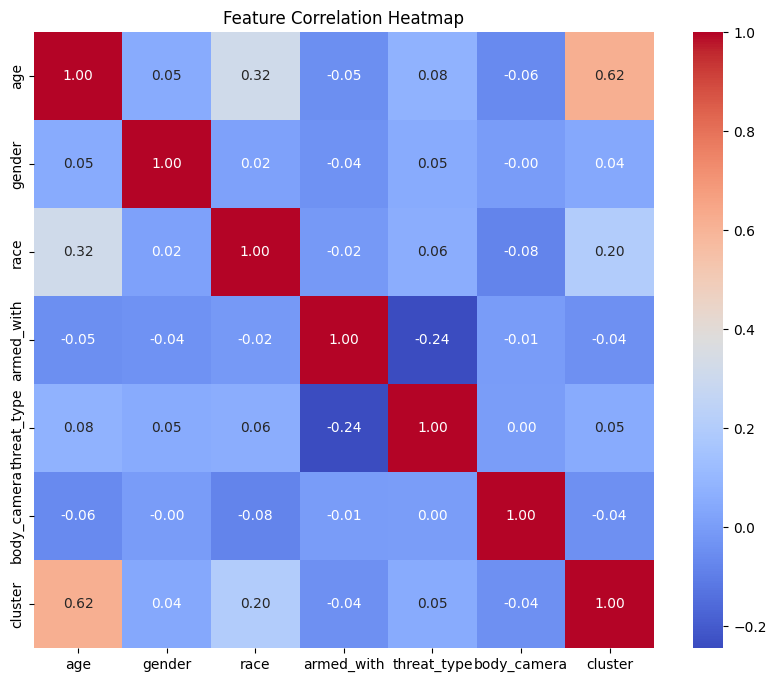

In [16]:
heatmap_data = df[['age', 'gender', 'race', 'armed_with', 'threat_type', 'body_camera', 'cluster']] # Include your target variable ('cluster' in this case)

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.savefig('feature_correlation_heatmap.png')
plt.show()

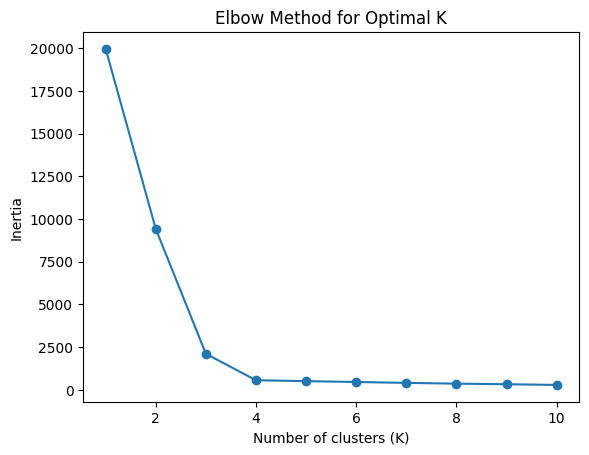

In [17]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)


inertia = []
for k in range(1, 11):  # K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.savefig('elbow_method.png')
plt.show()

The Elbow Method indicates that the clusters needed to analyze our data are two, more will not be needed, but would not they skew the data either, so the number chosen for this cluster works.

In [18]:
df.groupby('cluster').describe()

date                                                                \
          count         mean         std  min     25%     50%     75%     max   
cluster                                                                         
0        4251.0  1561.145613  917.852372  1.0   754.0  1567.0  2352.5  3148.0   
1        3869.0  1626.092789  922.376624  0.0   833.0  1636.0  2450.0  3148.0   
2        1377.0  1733.750908  882.463045  7.0  1045.0  1748.0  2527.0  3149.0   

        threat_type            ... body_camera      agency_ids               \
              count      mean  ...         75%  max      count         mean   
cluster                        ...                                            
0            4251.0  4.361562  ...         0.0  1.0     4251.0  1941.252411   
1            3869.0  4.407599  ...         0.0  1.0     3869.0  1843.791936   
2            1377.0  4.663036  ...         0.0  1.0     1377.0  1819.758170   

                                                          
                 std  min    25%     50%     75%     max  
cluster                                                   
0        1137.812777  0.0  920.5  1947.0  3051.0  3627.0  
1        1177.867650  4.0  699.0  1809.0  3003.0  3624.0  
2        1118.277436  1.0  821.0  1810.0  2957.0  3620.0  

[3 rows x 128 columns]

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [20]:
# Label Encoding
for col in ['state', 'race']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Feature Scaling
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])

# Create Dataset
class PoliceShootingsDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Split Data
X = df[['age', 'state']]
y = df['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DataLoaders
train_dataset = PoliceShootingsDataset(X_train, y_train)
test_dataset = PoliceShootingsDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [21]:
class RacePredictor(nn.Module):
    def __init__(self, input_size, num_classes):
        super(RacePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = 2
num_classes = len(df['race'].unique())
model = RacePredictor(input_size, num_classes)

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()


In [23]:
with torch.no_grad():
    sample_data = torch.tensor([[30, 10]], dtype=torch.float32)  # Example input
    predicted_race = model

In [26]:
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):


      print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658
Epoch 1/10, Loss: 1.2658


In [32]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluation on Test Data
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output, 1)

        y_true.extend(target.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate Performance Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.4737
Precision: 0.4726
Recall: 0.4737
F1 Score: 0.4478


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


According to this dataset, the only variable that is an easier metric to measure is the age of the victims. There are more instances in some states than others, but age is the driving factor. Since this dataset does not include the population overall of all people in the U.S., we can't conclude whether race is also a factor of fatal police shootings. Pytorch does not see a strong correlation between the variables either.